# Môn Trực quan hoá dữ liệu
* Bài tập: thực hành 1
* Sinh viên: Huỳnh Thị Bảo Trân
* MSSV: 19110482

1. Tìm hiểu ý nghĩa của các loại biểu đồ, đồ thị:
Comparison, Composition, Relationship, Distribution.

2. Thực hành: 

In [46]:
# cac thu vien da duoc su dung (neu co)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

a) Load data('COVID-19.csv') và trích lấy dữ liệu các cột sau: 'day','month','year','cases', 'deaths', 'countriesAndTerritories', 'continentExp' (trích data này là data để thực hiện các yêu cầu dưới).

In [47]:
# load du dieu tu file

data_fi = pd.read_csv('COVID-19.csv')
data = data_fi[['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'continentExp']]
data

,day,month,year,cases,deaths,countriesAndTerritories,continentExp
0,20,10,2020,87,5,Afghanistan,Asia
1,19,10,2020,59,4,Afghanistan,Asia
2,18,10,2020,68,3,Afghanistan,Asia
3,17,10,2020,47,4,Afghanistan,Asia
4,16,10,2020,0,0,Afghanistan,Asia
...,...,...,...,...,...,...,...
50197,25,3,2020,0,0,Zimbabwe,Africa
50198,24,3,2020,0,1,Zimbabwe,Africa
50199,23,3,2020,0,0,Zimbabwe,Africa
50200,22,3,2020,1,0,Zimbabwe,Africa


b) Vẽ 2 đồ thị histogram của columns cases và deaths trên cùng một cửa sổ (figure).(subplot)

C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


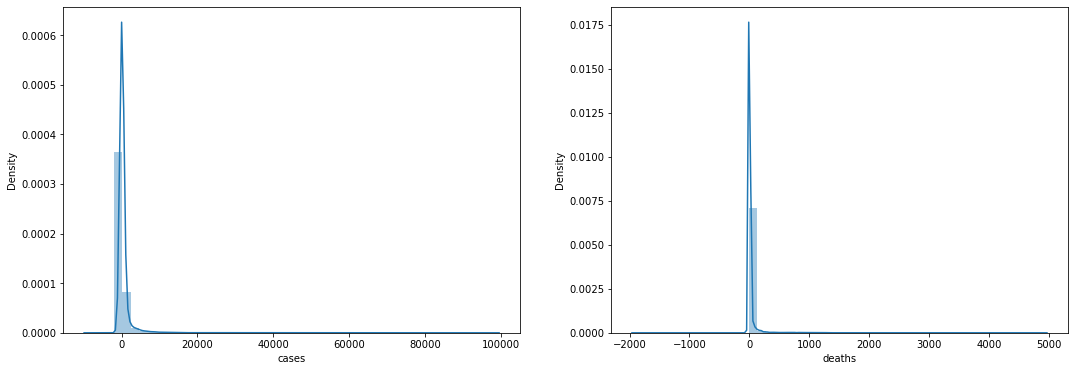

In [48]:
# ve do thi histogram cua cases va deaths

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.distplot(data.cases)

plt.subplot(1, 2, 2)
sns.distplot(data.deaths)
plt.show()

c) Thống kê tổng số cases và deaths của từng quốc gia.

In [49]:
# trich du lieu theo quoc gia

data_countries = data.groupby('countriesAndTerritories').sum()[['cases', 'deaths']]
print(data_countries)

                         cases  deaths
countriesAndTerritories               
Afghanistan              40287    1497
Albania                  17350     454
Algeria                  54616    1865
Andorra                   3623      62
Angola                    7622     247
...                        ...     ...
Vietnam                   1140      35
Western_Sahara             766       1
Yemen                     2060     599
Zambia                   15897     346
Zimbabwe                  8159     232

[211 rows x 2 columns]


d) Vẽ biểu đồ bar biểu diễn tổng case của 10 quốc gia có tổng cases lớn nhất.(Bằng 2 cách pandas, seaborn trên cùng figure).

       day  month  year  cases  deaths countriesAndTerritories continentExp
21773   17      9  2020  97894    1132                   India         Asia
21778   12      9  2020  97570    1201                   India         Asia
21779   11      9  2020  96551    1209                   India         Asia
21772   18      9  2020  96424    1174                   India         Asia
21780   10      9  2020  95735    1172                   India         Asia
21777   13      9  2020  94372    1114                   India         Asia
21771   19      9  2020  93337    1247                   India         Asia
21770   20      9  2020  92605    1133                   India         Asia
21776   14      9  2020  92071    1136                   India         Asia
21783    7      9  2020  90802    1016                   India         Asia


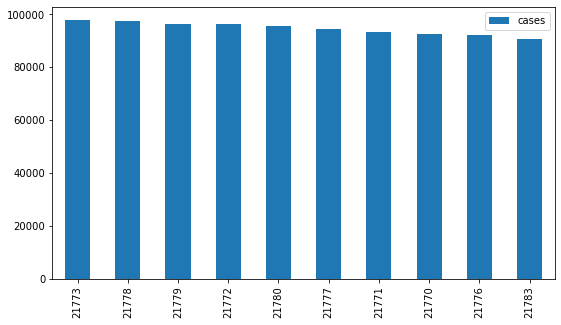

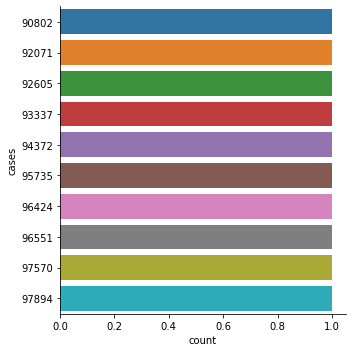

In [50]:
# trich du lieu 10 quoc gia lon nhat

data_countries_cases = data.sort_values(by = ['cases'], ascending = False).head(10)
print(data_countries_cases)

# ve bieu do tong cases 10 quoc gia lon nhat

data_countries_cases.plot(y = 'cases', kind ='bar', figsize = (9, 5))
sns.catplot(y = 'cases', data = data_countries_cases, kind = 'count')

e) Tương tự d) nhưng biểu diễn tổng deaths của 10 quốc gia có tổng death lớn nhất.

       day  month  year  cases  deaths   countriesAndTerritories continentExp
48133   16      4  2020  30148    4928  United_States_of_America      America
36471   14      8  2020   9441    3935                      Peru      America
36492   24      7  2020   4546    3887                      Peru      America
13716    7      9  2020  -8261    3800                   Ecuador      America
48131   18      4  2020  30833    3770  United_States_of_America      America
1676     2     10  2020  14001    3351                 Argentina      America
48125   24      4  2020  26543    3179  United_States_of_America      America
30059    9     10  2020   4936    3013                    Mexico      America
48119   30      4  2020  27326    2611  United_States_of_America      America
48127   22      4  2020  37289    2524  United_States_of_America      America


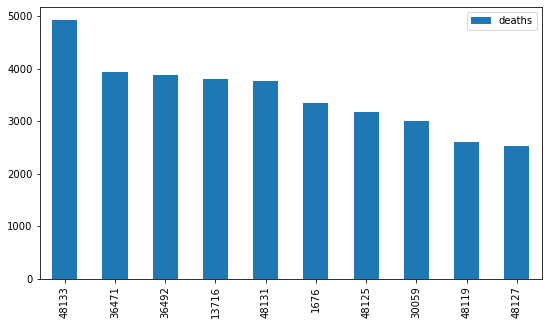

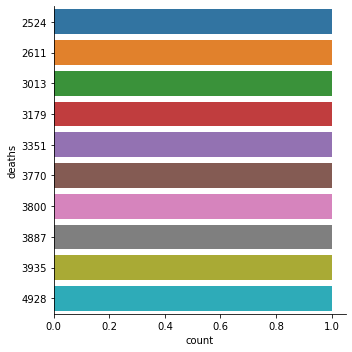

In [51]:
# trich du lieu bieu dien deaths của 10 quoc gia

data_countries_deaths = data.sort_values(by = ['deaths'], ascending = False).head(10)
print(data_countries_deaths)

# ve bieu do bieu dien

data_countries_deaths.plot(y = ['deaths'], kind = 'bar', figsize = (9, 5))
sns.catplot(y = 'deaths', data = data_countries_deaths, kind = 'count')

f) Thông kê tổng số (cases) và (deaths) của từng lục địa (continentExp).

In [52]:
# tong so cases va deaths theo luc dia

data_contientExp = data.groupby('continentExp').sum()[['cases', 'deaths']]
print(data_contientExp)

                 cases  deaths
continentExp                  
Africa         1656480   39931
America       18977833  611701
Asia          12516197  224029
Europe         7284085  242594
Oceania          37214    1021
Other              696       7


g) Vẽ biểu đồ bar để biểu diễn câu f) (mô tả : Trục ngang là các continentExp , mỗi continentExp có 2 cột biểu diễn cases và deaths) (Cả 2 cách pandas và seaborn trên cùng figure).

C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


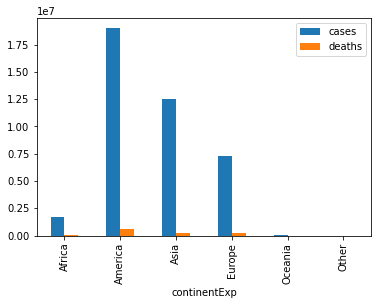

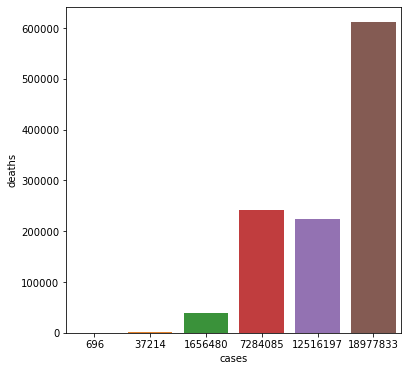

In [53]:
# ve bieu do the hien

#plt.figure(figsize = (24, 6))
#plt.subplot(1, 2, 1)
data_contientExp.plot(y = ['cases', 'deaths'], kind = 'bar')
#plt.subplot(1, 2, 2)
plt.figure(figsize = (6, 6))
sns.barplot('cases', "deaths", data = data_contientExp);

h) Trích data có columns là Việt Nam.

In [54]:
# trich du lieu theo cot la Viet Nam

data_VN = data.loc[data.countriesAndTerritories == 'Vietnam']
print(data_VN)

       day  month  year  cases  deaths countriesAndTerritories continentExp
49109   20     10  2020      6       0                 Vietnam         Asia
49110   19     10  2020      8       0                 Vietnam         Asia
49111   18     10  2020      2       0                 Vietnam         Asia
49112   17     10  2020      0       0                 Vietnam         Asia
49113   16     10  2020      2       0                 Vietnam         Asia
...    ...    ...   ...    ...     ...                     ...          ...
49395    4      1  2020      0       0                 Vietnam         Asia
49396    3      1  2020      0       0                 Vietnam         Asia
49397    2      1  2020      0       0                 Vietnam         Asia
49398    1      1  2020      0       0                 Vietnam         Asia
49399   31     12  2019      0       0                 Vietnam         Asia

[291 rows x 7 columns]


i) Thống kê số lượng cases và deaths theo từng tháng của Việt Nam bắt đầu từ 1/1/2020.

In [55]:
# thong ke cases va deaths theo thang

data_VN = data_VN.loc[data['year'] >= 2020]
data_date = data_VN.groupby('month').sum()[['cases', 'deaths']]
print(data_date)

       cases  deaths
month               
1          5       0
2         11       0
3        190       0
4         64       0
5         57       0
6         28       0
7        154       0
8        531      32
9         54       3
10        46       0



j) Vẽ biểu đồ đường để biểu i) (đồ thị gồm 2 line) và chú thích điểm lớn nhất trên từng line. (Dùng pandas hoặc seaborn).

<AxesSubplot:xlabel='month'>

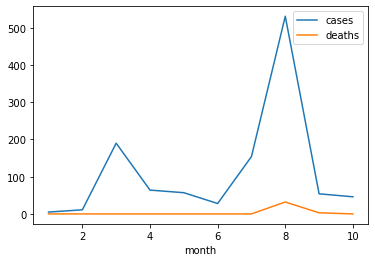

In [56]:
# ve bieu do the hien

data_date.plot(kind='line')